In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
column_names=["People in Household","Income of Household","Income Source","Vehicle Type","Loan Required"]
data = pd.read_excel('HouseholdData.xlsx', sheet_name='Sheet 1 - Household_data',header=None, names=column_names)

In [7]:
data

,People in Household,Income of Household,Income Source,Vehicle Type,Loan Required
0,Household_data,NaN,NaN,NaN,NaN
1,People in Household,Income of Household,Income Source,Vehicle Type,Loan Required
2,10,3175,Business,Car,Yes
3,4,14420,Job,Scooter,Yes
4,9,14432,Business,Scooter,No
...,...,...,...,...,...
1208,7,9581,Job,Car,Yes
1209,9,13745,Job,Sports Car,No
1210,3,10985,Job,Trackter,No
1211,7,6051,Business,Car,Yes


In [8]:
df=data.iloc[2:,:]

In [9]:
df.reset_index().drop(columns="index")

,People in Household,Income of Household,Income Source,Vehicle Type,Loan Required
0,10,3175,Business,Car,Yes
1,4,14420,Job,Scooter,Yes
2,9,14432,Business,Scooter,No
3,7,13222,Business,Trackter,No
4,8,8116,Job,Bicycle,No
...,...,...,...,...,...
1206,7,9581,Job,Car,Yes
1207,9,13745,Job,Sports Car,No
1208,3,10985,Job,Trackter,No
1209,7,6051,Business,Car,Yes


In [10]:
df

,People in Household,Income of Household,Income Source,Vehicle Type,Loan Required
2,10,3175,Business,Car,Yes
3,4,14420,Job,Scooter,Yes
4,9,14432,Business,Scooter,No
5,7,13222,Business,Trackter,No
6,8,8116,Job,Bicycle,No
...,...,...,...,...,...
1208,7,9581,Job,Car,Yes
1209,9,13745,Job,Sports Car,No
1210,3,10985,Job,Trackter,No
1211,7,6051,Business,Car,Yes


In [11]:
df.describe()


,People in Household,Income of Household,Income Source,Vehicle Type,Loan Required
count,1211,1211,1205,1211,1205
unique,8,1148,8,5,3
top,10,4131,Business,Car,Yes
freq,175,3,541,485,650


In [12]:
count=0
for col in df.columns:
    if np.dtype(df[col]) == 'O':
        print(df[col].value_counts())
        print("=============================================================================")
        count+=1
    else:
        continue
print(count)

People in Household
10    175
3     164
9     158
5     158
8     145
6     138
7     137
4     136
Name: count, dtype: int64
Income of Household
4131     3
10536    3
3175     2
9757     2
11819    2
        ..
4123     1
4041     1
8426     1
6463     1
14058    1
Name: count, Length: 1148, dtype: int64
Income Source
Business         541
Job              463
Agriculture       39
Real Estate       37
Film Industry     36
Teacher           36
MSME              36
Scientist         17
Name: count, dtype: int64
Vehicle Type
Car           485
Scooter       242
Trackter      242
Bicycle       121
Sports Car    121
Name: count, dtype: int64
Loan Required
Yes    650
No     554
no       1
Name: count, dtype: int64
5


In [13]:
count=0
for col in df.columns:
    if df[col].isnull().sum() != 0:
        print(col)
        print(df[col].isnull().sum())
        print("=============================================================================")
        count+=1
    else:
        continue
print(count)

Income Source
6
Loan Required
6
2


In [14]:
df[df['Loan Required'].isnull()]


,People in Household,Income of Household,Income Source,Vehicle Type,Loan Required
1130,4,5697,Business,Trackter,NaN
1131,3,10213,Film Industry,Car,NaN
1132,4,4383,Teacher,Car,NaN
1133,4,13833,MSME,Scooter,NaN
1134,4,9737,Real Estate,Scooter,NaN
1135,8,5463,Agriculture,Trackter,NaN


In [15]:
df[df['Income Source'].isnull()]

,People in Household,Income of Household,Income Source,Vehicle Type,Loan Required
463,9,4255,NaN,Scooter,No
464,4,11489,NaN,Scooter,Yes
465,3,5619,NaN,Trackter,No
744,5,6682,NaN,Scooter,Yes
745,8,4429,NaN,Trackter,Yes
746,3,3026,NaN,Bicycle,No


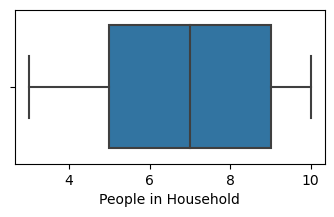

In [16]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='People in Household', data=df)
plt.show()


In [17]:
df['Loan Required'].value_counts()


Loan Required
Yes    650
No     554
no       1
Name: count, dtype: int64

In [18]:
df.loc[df['Loan Required']=="no",'Loan Required']='No'


C:\Users\starb\AppData\Local\Temp\ipykernel_23088\2551562125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Loan Required']=="no",'Loan Required']='No'


In [19]:
df['Loan Required'].value_counts()


Loan Required
Yes    650
No     555
Name: count, dtype: int64

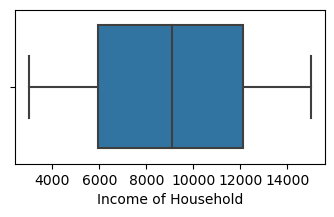

In [20]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='Income of Household', data=df)
plt.show()


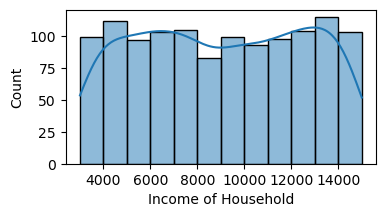

In [21]:
plt.figure(figsize=(4, 2))
sns.histplot(data=df, x='Income of Household', kde=True)
plt.show()

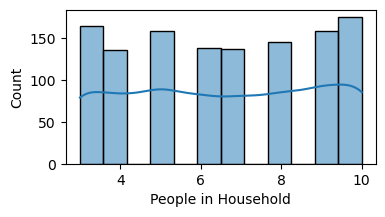

In [22]:
plt.figure(figsize=(4, 2))
sns.histplot(data=df, x='People in Household', kde=True)
plt.show()

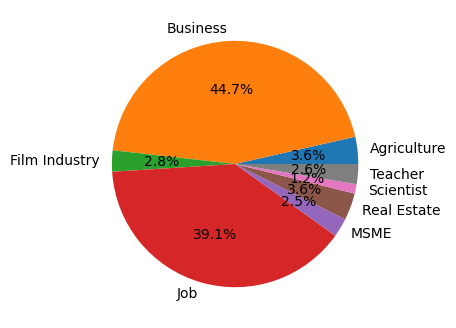

In [23]:
plt.figure(figsize=(4, 4))
#d=df.loc[:,['Income Source','Loan Required']].groupby('Income Source').agg('count')
d=df.loc[df['Loan Required']=="Yes",['Income Source','Loan Required']].groupby('Income Source').agg('count')
plt.pie(list(d['Loan Required']),labels=list(d.index),autopct='%1.1f%%')
plt.show()


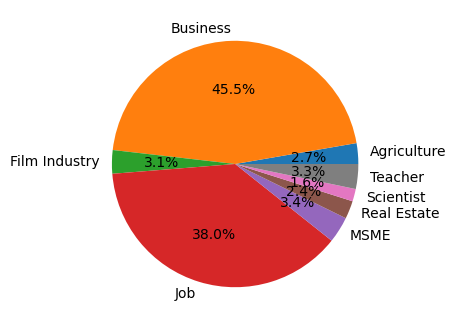

In [24]:
plt.figure(figsize=(4, 4))
#d=df.loc[:,['Income Source','Loan Required']].groupby('Income Source').agg('count')
d=df.loc[df['Loan Required']=="No",['Income Source','Loan Required']].groupby('Income Source').agg('count')
plt.pie(list(d['Loan Required']),labels=list(d.index),autopct='%1.1f%%')
plt.show()

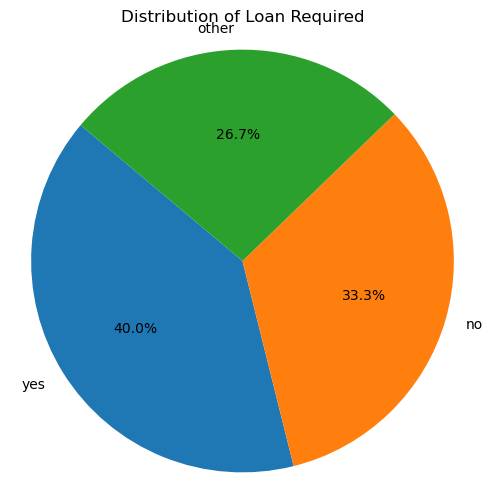

In [47]:
labels = ['yes','no','other']
sizes = [6,5,4]  
explode = (0.1,0, 0)
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of Loan Required')
plt.axis('equal') 
plt.show()


In [25]:
df.isnull().sum()

People in Household    0
Income of Household    0
Income Source          6
Vehicle Type           0
Loan Required          6
dtype: int64

In [26]:
df['Income Source'].fillna("Business",inplace=True)

C:\Users\starb\AppData\Local\Temp\ipykernel_23088\3240501472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income Source'].fillna("Business",inplace=True)


In [28]:
df = df.dropna(subset=['Loan Required'])

In [29]:
numerical_cols = ["People in Household", "Income of Household"]
df[numerical_cols] = df[numerical_cols].astype(float)  
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()


threshold = 2
anomaly_mask = (np.abs(z_scores) > threshold).any(axis=1)
print("Anomalies:")
print(df[anomaly_mask])

Anomalies:
Empty DataFrame
Columns: [People in Household, Income of Household, Income Source, Vehicle Type, Loan Required]
Index: []


In [30]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()

In [31]:
df["People in Household"]=mx.fit_transform(df[["People in Household"]])

In [32]:
df["Income of Household"]=mx.fit_transform(df[["Income of Household"]])

In [33]:
df_encoded = pd.get_dummies(df, columns=['Income Source', 'Vehicle Type'])

In [34]:
x = df_encoded.drop('Loan Required', axis=1)
y = df_encoded['Loan Required']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2529)

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
lr.score(x_test,y_test)

0.5311203319502075

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(random_state=42)

In [40]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = dtc.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4896265560165975


In [43]:
# Logistic Regression is the most suitable algotithm for this dataset

In [44]:
#Supervised learning techniques are better because we can train the model to make predictions based on our inputs and changes